## Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/Shareddrives/Learning_Deep/binary_stars/

/content/drive/Shareddrives/Learning_Deep/binary_stars


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from main import *
from models import *
import os
import torch
import numpy as np

# For Avraham: To load and test pre-trained models

This section can be used to load the desired models. We have trained a variety of different models in a number of architectures. However, the models that turned out to be most effective were based on 1-D convolution. Below is a quick summary of the most relevant models for you to load and test out:

1- 'convolution1d_model_normalized_50epoch': Trained for all 12 outputs, only on path 4. Trained for 50 epochs on normalized output data \\
2- 'all_data_convolutional': Trained for all 12 outputs, on paths 0-4. Trained for 50 epochs on normalized output data \\
3- 'X_convolutional_unnormalized': Trained on only 2 outputs - whatever parameter corresponds to the X (vsini, m, a, t, log_g, or l). Trained on paths 0-4 for 40 epochs using the original, unnormalized output data

There are two basic steps, further explained in the relevant code blocks. But, essentially: \\
Step 1: Select which portions of the original dataset files you wish to inference on \\
Step 2: Run the model on the data you selected. There are two separate blocks for this. Block 2A runs the 12 parameter models that were trained with output normalization. Block 2B runs the two-parameter models trained on the original data. Of note: both inference upon, and output a loss corresponding to, the unaltered original data and outputs \\


In [ ]:
# Step 1: Select portion of dataset
'''
INSTRUCTIONS:
adjust 'paths' to select a portion of the path_options string. 
This will determine which portion of the dataset to test on. 
I would recommend limiting to 3-4 paths so as not to overload RAM
'''

path_options = [0, 1, 2, 3, 4, 5, 6, 7, 9]
paths = path_options[:3]
label_options = ['list_vsini_1',
                    'list_vsini_2',
                    'list_m_1',
                    'list_m_2',
                    'list_a_1',
                    'list_a_2',
                    'list_t_1',
                    'list_t_2',
                    'list_log_g_1',
                    'list_log_g_2',
                    'list_l_1',
                    'list_l_2']

In [ ]:
# Step 2A: Run normalized models - same single model for all 12 parameters, trained on different portions of training set
'''
INSTRUCTIONS:
Adjust 'name_model' to select one of the full, 12 factor models
We recommend the "all_data_convoltional" model
You can also change the 'data' variable to be trn, vld, or tst to select different portions of the dataset
We recommend maintaining data set to 'tst'
In the "evaluate_model_denormalize" function, the "wordy" boolean is used to display sample model outputs
The idea of this "wordy" option is to provide a coarse method of analysis, to compare the actual values with the value that the model predicts
If these outputs are distracting, set "wordy" to False
'''

names = ['convolution1d_model_normalized_50epoch', 'all_data_convolutional']
name_model = names[0]  ### Select one of the two options

# Load data, select data to evaluate on
labels=label_options
trn, vld, tst, _ = prepare_data(paths, labels, normalize=False)
data=tst   # Select which portion of the dataset (trn, vld, tst) to run inference on

# Load model and scale parameters
model_path = f"./state_dicts/{name_model}_model.pt"
scale_params = np.load(f"./scale_params/{name_model}_scale_params.npy", allow_pickle=True).item()
model = ConvolutionalNet(len(labels))
model.load_state_dict(torch.load(model_path))

# Evaluate model on unnormalized data
model.eval()
full_model_loss = evaluate_model_denormalize(data, model, scale_params, wordy=True)

print("Combined loss of {} model: {}".format(name_model, full_model_loss))

Creating dataset from 30468 cases
Split into 18280 train, 6094 test, and 6094 test
vsini predictions:  [5.743657735095589, 8.17078611964924]
vsini actual:  [3.0, 6.0]
metallicity predictions:  [0.3149033903277698, 0.49063175436801026]
metallicity actual:  [1.0, 0.5]
alpha predictions:  [0.11073727633549335, 0.019552256444766214]
alpha actual:  [0.0, 0.0]
temperature predictions:  [6438.016275248315, 4773.208915023327]
temperature actual:  [3500.0, 6500.0]
log_g predictions:  [2.904191620920147, 4.03887116716076]
log_g actual:  [4.0, 3.0]
luminosity predictions:  [516309372045.1063, 151621096811.00894]
luminosity actual:  [76580003840.0, 485540003840.0]

vsini predictions:  [4.134594195941252, 4.88214382968628]
vsini actual:  [6.0, 4.0]
metallicity predictions:  [0.1315447324574267, 0.6515361412400174]
metallicity actual:  [1.0, 0.0]
alpha predictions:  [0.02123006431497973, -0.07076591360787271]
alpha actual:  [0.20000000298023224, -0.20000000298023224]
temperature predictions:  [4647.

In [ ]:
# Step 2B: Run any of the 2-factor models directly
'''
INSTRUCTIONS:
Enter an integer, picked from the below list, into the variable i, then run the block
0: visini
1: metallicity
2: alpha
3: temperature
4: log_g
5: luminosity

You can again adjust the 'data' and 'wordy' variables in this block, if desired
'''


# Make your selection here
i=3

# Select model and labels
names = ['vsini_conv_unnormalized', 'm_conv_unnormalized', 'a_conv_unnormalized', 't_conv_unnormalized', 'log_g_conv_unnormalized', 'l_conv_unnormalized']
labels = label_options[2*i:2*i+2]
name_model = names[i]

# Load data
trn, vld, tst, _ = prepare_data(paths, labels, normalize=False)
data=tst

# Load model and scale parameters
model_path = f"./state_dicts/{name_model}_model.pt"
scale_params = np.load(f"./scale_params/{name_model}_scale_params.npy", allow_pickle=True).item()
model = ConvolutionalNet(len(labels))
model.load_state_dict(torch.load(model_path))

# Evaluate model on unnormalized data
model.eval()
full_model_loss = evaluate_model(data, model, wordy=True)

print("Combined loss of {} model: {}".format(name_model, full_model_loss))

Creating dataset from 20308 cases
Split into 12184 train, 4062 test, and 4062 test
Predictions:  [4536.3916015625, 5414.86669921875]
Actual:  [5000.0, 5500.0]
Predictions:  [6630.7431640625, 6301.84521484375]
Actual:  [6500.0, 6500.0]
Predictions:  [5224.2587890625, 5688.3662109375]
Actual:  [5500.0, 5500.0]
Predictions:  [4232.916015625, 5091.7900390625]
Actual:  [5000.0, 4500.0]
Combined loss of t_conv_unnormalized model: 402909.8125


# For Avraham: To train new models



To train new models withour architecture, run the below two cells \\
The first cell is for selecting your parameters \\
The second cell is for training the model based on your selections \\
One note: because of the large size of the dataset, we did not elect to train with all of it. Furthermore, in the current setup, attempting to create a full dataset with all of the given files and all of the desired labels will likely overload your RAM \\
We recommend training on a maximum of 5 of the given source files (in path) \\ \\

Outputs: Running these cells will train and create convergence graphs for the model the parameters you select. It will also output updates to you to see how training is progressing. Once the blocks are complete, it will save several things for you to access later: \\
1- It will save the state dictionary of the best performing model from training in the "state_dicts" folder. THis will be accessible as "name_model.pt" \\
2- It will save the lists showing model losses over time. These lists can be used to recreate convergence graphs, if desired. They will be saved in the "losses" folder as "name_model_set_loss.npy" \\
3- It will save "name_model_scale_params.npy" in the "scale_params folder" - this is only relevant for models that have been trained with output normalization \\


For all of the above: name_model will be replaced with whatever you enter as "name_model" in the below block


In [ ]:
# Step 1: Set your desired training parameters
'''
INPUTS:
name_model: 
path: list of integers, corresponding to desired data (select subset of path_options)
labels: list of strings, corresponding to the variables that you wish to train for (select subset of label_options)
lr: float, desired learning rate
num_epochs: integer, number of epochs for training
normalized: boolean, to train with normalized or unnormalized outputs
'''
name_model = 'enter_model_name_as_string'
path_options = [0, 1, 2, 3, 4, 5, 6, 7, 9]
paths = path_options[:1]
label_options = ['list_vsini_1',
                    'list_vsini_2',
                    'list_m_1',
                    'list_m_2',
                    'list_a_1',
                    'list_a_2',
                    'list_t_1',
                    'list_t_2',
                    'list_log_g_1',
                    'list_log_g_2',
                    'list_l_1',
                    'list_l_2']
labels = label_options               
lr = 2e-3
num_epochs = 50
normalized=True

In [ ]:
# Step 2: Train your model (No need to adjust this block)

# Load data
trn_norm, vld_norm, tst_norm, scale_params = prepare_data(paths, labels, normalize=normalized)

# Save scale pasams
np.save(f"./scale_params/{name_model}_scale_params.npy", scale_params)

# Run model, track loss, save best model and losses
data = (trn_norm, vld_norm, tst_norm)

model = ConvolutionalNet(len(labels))
trn_loss_norm, tst_loss_norm, vld_loss_norm = train(data, model, num_epochs, lr, name=name_model, schedule=False)
np.save(f"./losses/{name_model}_trn_loss.npy", trn_loss_norm)
np.save(f"./losses/{name_model}_tst_loss.npy", tst_loss_norm)
np.save(f"./losses/{name_model}_vld_loss.npy", vld_loss_norm)

# Plot convergence
plot_convergence(trn_loss_norm, vld_loss_norm, tst_loss_norm, title=name_model)

Creating dataset from 10141 cases
Split into 6085 train, 2028 test, and 2028 test
Starting training for model: enter_model_as_string.

Epoch : 1 || Train set loss : 6.612
Epoch : 1 || Validation set loss : 6.633
Epoch : 1 || Test set loss : 6.735
Saving model
*************************************************

Epoch : 2 || Train set loss : 5.493
Epoch : 2 || Validation set loss : 5.543
Epoch : 2 || Test set loss : 5.640
Saving model
*************************************************

Epoch : 3 || Train set loss : 5.229
Epoch : 3 || Validation set loss : 5.359
Epoch : 3 || Test set loss : 5.387
Saving model
*************************************************

Epoch : 4 || Train set loss : 4.882
Epoch : 4 || Validation set loss : 5.094
Epoch : 4 || Test set loss : 5.091
Saving model
*************************************************

Epoch : 5 || Train set loss : 4.602
Epoch : 5 || Validation set loss : 4.791
Epoch : 5 || Test set loss : 4.789
Saving model
************************************

KeyboardInterrupt: ignored

# Extra blocks - ignore unless interested

The below blocks do a few things: \\
1- Run the 2-parameter and 12-parameter models side by side, to compare the outputs for a desired parameter. For example: see how the loss and outputs differ when running the log_g_convolutional_unnormalized model against the corresponding outputs of the 12-factor model \\
2- Run all 2-factor models in a loop (just a simple way to see all results) \\
3 - Display the convergence graphs for all of the 2-parameter models that we trained

In [ ]:
# Compare the results of a two-factor model with those parameters from the 12-factor model

'''Enter an integer, picked from the below list, into the variable i, then run the block
0: visini
1: metallicity
2: alpha
3: temperature
4: log_g
5: luminosity

'''

# Make your selections here
i=5
j=1 # 0 for trained on only path 4, select 1 for "all_data_convolutional"

#### TWO-FACTOR SECTION
# Select model and labels
names = ['vsini_conv_unnormalized', 'm_conv_unnormalized', 'a_conv_unnormalized', 't_conv_unnormalized', 'log_g_conv_unnormalized', 'l_conv_unnormalized']
labels = label_options[2*i:2*i+2]
name_model = names[i]

# Load data
trn, vld, tst, _ = prepare_data(paths, labels, normalize=False)
data=tst

# Load model and scale parameters
model_path = f"./state_dicts/{name_model}_model.pt"
scale_params = np.load(f"./scale_params/{name_model}_scale_params.npy", allow_pickle=True).item()
model = ConvolutionalNet(len(labels))
model.load_state_dict(torch.load(model_path))

# Evaluate model on unnormalized data
model.eval()
full_model_loss = evaluate_model(data, model, wordy=True)

print("Combined loss of {} model: {}".format(name_model, full_model_loss))


#### FULL 12-PARAMS SECTION
names = ['convolution1d_model_normalized_50epoch', 'all_data_convolutional']
name_model = names[j]  ### Select one of the two options

# Load data, select data to evaluate on
labels=label_options
trn, vld, tst, _ = prepare_data(paths, labels, normalize=False)
data=tst   # Select which portion of the dataset (trn, vld, tst) to run inference on

# Load model and scale parameters
model_path = f"./state_dicts/{name_model}_model.pt"
scale_params = np.load(f"./scale_params/{name_model}_scale_params.npy", allow_pickle=True).item()
model = ConvolutionalNet(len(labels))
model.load_state_dict(torch.load(model_path))

# Evaluate model on unnormalized data
model.eval()
full_model_loss = evaluate_model_denormalize_2_from_12(data, model, scale_params, j=i, wordy=True)

print("Combined loss of {} model: {}".format(name_model, full_model_loss))

Creating dataset from 30468 cases
Split into 18280 train, 6094 test, and 6094 test
Predictions:  [508543041536.0, 150856794112.0]
Actual:  [76580003840.0, 485540003840.0]
Predictions:  [91791581184.0, 98251505664.0]
Actual:  [98446000128.0, 109420003328.0]
Predictions:  [41726255104.0, 39373910016.0]
Actual:  [37880999936.0, 37885001728.0]
Predictions:  [373589999616.0, 207860482048.0]
Actual:  [410919993344.0, 336250011648.0]
Predictions:  [19546775552.0, 27827286016.0]
Actual:  [10981999616.0, 11980000256.0]
Predictions:  [59857977344.0, 2748798976.0]
Actual:  [9984900096.0, 41031000064.0]
Combined loss of l_conv_unnormalized model: 7.244761139515776e+21
Creating dataset from 30468 cases
Split into 18280 train, 6094 test, and 6094 test
Predictions:  [85943644171.00864, 502106244391.5531]
Actual:  [76580003840.0, 485540003840.0]
Predictions:  [76688957735.66501, 82522185285.98074]
Actual:  [98446000128.0, 109420003328.0]
Predictions:  [40508387068.68465, 67566527654.98514]
Actual:  [3

In [ ]:
# Run all 6 two factor models in a loop

name_model = 'enter_model_as_string'
path_options = [0, 1, 2, 3, 4, 5, 6, 7, 9]
paths = path_options[:2]  # Pick which portion of dataset to run on
label_options = ['list_vsini_1',
                    'list_vsini_2',
                    'list_m_1',
                    'list_m_2',
                    'list_a_1',
                    'list_a_2',
                    'list_t_1',
                    'list_t_2',
                    'list_log_g_1',
                    'list_log_g_2',
                    'list_l_1',
                    'list_l_2']

for i in range(0, len(label_options), 2):

  # Select parameter
  labels = label_options[i:i+2]
  name_model = '{}_conv_unnormalized'.format(labels[0][5:-2])

  # Load data
  trn, vld, tst, _ = prepare_data(paths, labels, normalize=False)
  data=tst

  # Load model and scale parameters
  model_path = f"./state_dicts/{name_model}_model.pt"
  scale_params = np.load(f"./scale_params/{name_model}_scale_params.npy", allow_pickle=True).item()
  model = ConvolutionalNet(len(labels))
  model.load_state_dict(torch.load(model_path))

  # Evaluate model on unnormalized data
  model.eval()
  full_model_loss = evaluate_model(data, model, wordy=True)

  print("Combined loss of {} model: {}".format(name_model, full_model_loss))

Creating dataset from 20308 cases
Split into 12184 train, 4062 test, and 4062 test
Predictions:  [3.4311578273773193, 6.874391078948975]
Actual:  [7.0, 4.0]
Predictions:  [4.597313404083252, 6.9208903312683105]
Actual:  [5.0, 8.0]
Predictions:  [0.3337702453136444, 2.6113786697387695]
Actual:  [1.0, 0.0]
Predictions:  [4.684398651123047, 7.74240255355835]
Actual:  [6.0, 6.0]
Combined loss of vsini_conv_unnormalized model: 3.9621567726135254
Creating dataset from 20308 cases
Split into 12184 train, 4062 test, and 4062 test
Predictions:  [0.44384104013442993, 0.059858307242393494]
Actual:  [0.5, 0.0]
Predictions:  [0.8768831491470337, 0.2541707754135132]
Actual:  [1.0, 0.0]
Predictions:  [0.8463253974914551, 0.5027627944946289]
Actual:  [1.0, 0.5]
Predictions:  [0.6861558556556702, 0.024404853582382202]
Actual:  [0.0, 1.0]
Combined loss of m_conv_unnormalized model: 0.07558994740247726
Creating dataset from 20308 cases
Split into 12184 train, 4062 test, and 4062 test
Predictions:  [-0.12

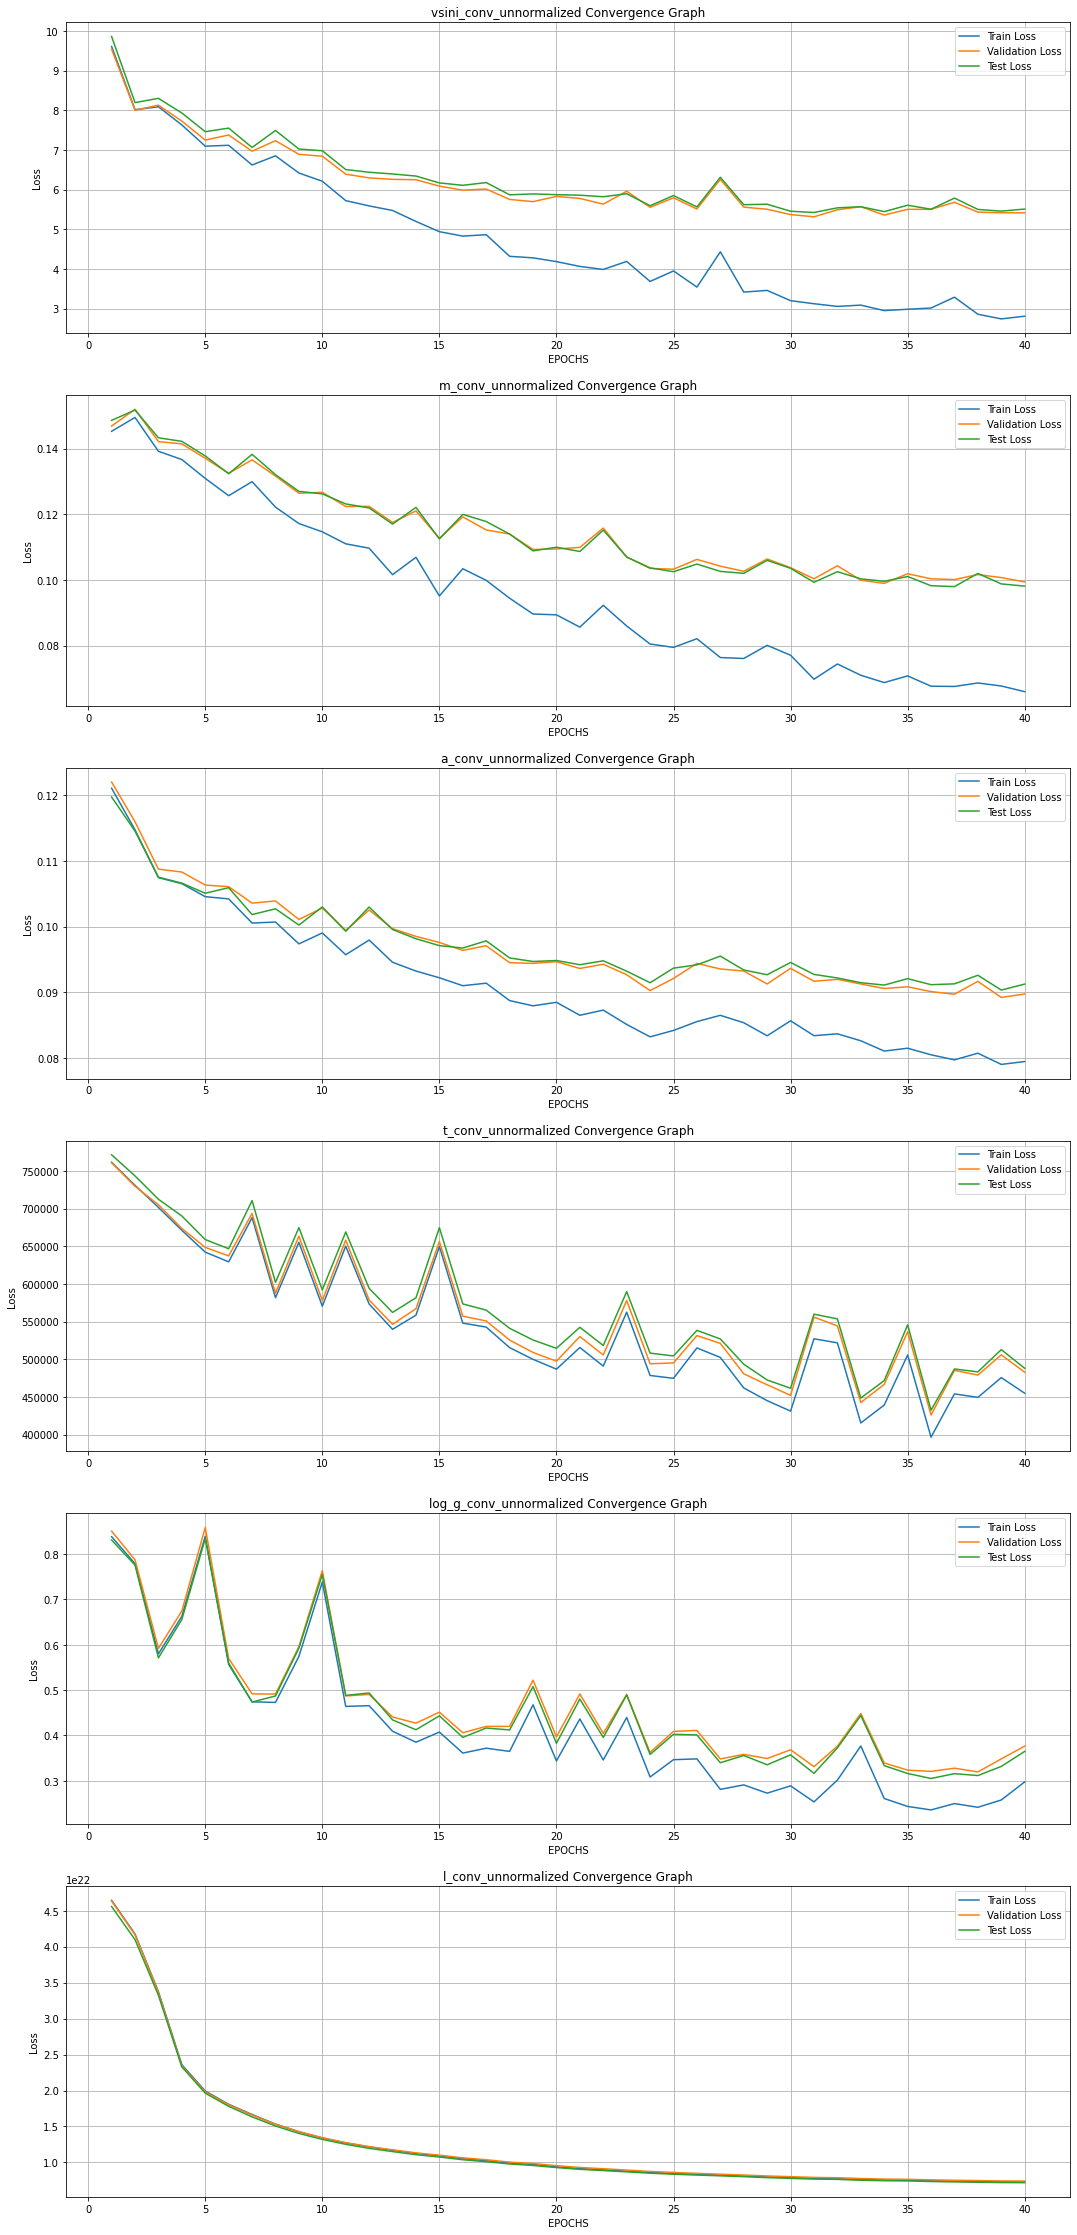

In [ ]:
# Creat Convergence Graphs to view the training of the 2-factor models

fig, axs = plt.subplots(6, 1, figsize=(18, 40))
j=0
label_options = ['list_vsini_1',
                    'list_vsini_2',
                    'list_m_1',
                    'list_m_2',
                    'list_a_1',
                    'list_a_2',
                    'list_t_1',
                    'list_t_2',
                    'list_log_g_1',
                    'list_log_g_2',
                    'list_l_1',
                    'list_l_2']

for i in range(0, len(label_options), 2):
  labels = label_options[i:i+2]
  name_model = '{}_conv_unnormalized'.format(labels[0][5:-2])
  trn_loss = np.load(f"./losses/{name_model}_trn_loss.npy")
  tst_loss = np.load(f"./losses/{name_model}_tst_loss.npy")
  vld_loss = np.load(f"./losses/{name_model}_vld_loss.npy")
  axs[j].plot(np.arange(1, len(trn_loss)+1),
            trn_loss, label='Train Loss')
  axs[j].plot(np.arange(1, len(vld_loss)+1),
            vld_loss, label='Validation Loss')
  axs[j].plot(np.arange(1, len(tst_loss)+1),
            tst_loss, label='Test Loss')
  axs[j].set_xlabel("EPOCHS")
  axs[j].set_ylabel('Loss')
  axs[j].set_title(name_model + ' Convergence Graph')
  axs[j].legend()
  axs[j].grid()

  j+=1